## Step 1. Describe your data set:

* The data set was donated in the year 2017 by Luis Candanedo, University of Mons (UMONS). The data was collected to create regression models of appliances energy use in a low energy building.
* Each appliance in the house were attached with a sensor node and the temperature and the humidity was recorded every 3.3 minutes. The average of these temperature was recorded for every 10 minutes.
* The data was collected in the year 2016, January 11th to May 27th.
* The outside temperatures were also recorded to check the appliances energy use in low energy buildings.
* The data was divided into training and testing set to perform regression models to reduce the MSE of the model to predict the enrgy use by an appliance.

## Step 2. Load the dataset

In [191]:
library(ggplot2)
library(tidyverse)
library(tibble)
library(lubridate)
library(patchwork)

In [156]:
appdata<-read.csv("energydata_complete.csv")

## Step 3. Explore your dataset

In [157]:
head(appdata)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,⋯,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2,2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,⋯,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619
3,2016-01-11 17:20:00,50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,⋯,17.00000,45.50,6.366667,733.7,92,6.333333,55.33333,5.1,28.64267,28.64267
4,2016-01-11 17:30:00,50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.250000,733.8,92,6.000000,51.50000,5.0,45.41039,45.41039
5,2016-01-11 17:40:00,60,40,19.89,46.33333,19.2,44.53000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.133333,733.9,92,5.666667,47.66667,4.9,10.08410,10.08410
6,2016-01-11 17:50:00,50,40,19.89,46.02667,19.2,44.50000,19.79,44.93333,18.89000,⋯,17.00000,45.29,6.016667,734.0,92,5.333333,43.83333,4.8,44.91948,44.91948


* The data consists of 29 columns 
* T and the RH values represent the temperature and humidity recorded for an appliance.
* The first column consists of the date and time the temperature was recorded for the appliances.



In [158]:
summary(appdata)

     date             Appliances         lights             T1       
 Length:19735       Min.   :  10.0   Min.   : 0.000   Min.   :16.79  
 Class :character   1st Qu.:  50.0   1st Qu.: 0.000   1st Qu.:20.76  
 Mode  :character   Median :  60.0   Median : 0.000   Median :21.60  
                    Mean   :  97.7   Mean   : 3.802   Mean   :21.69  
                    3rd Qu.: 100.0   3rd Qu.: 0.000   3rd Qu.:22.60  
                    Max.   :1080.0   Max.   :70.000   Max.   :26.26  
      RH_1             T2             RH_2             T3       
 Min.   :27.02   Min.   :16.10   Min.   :20.46   Min.   :17.20  
 1st Qu.:37.33   1st Qu.:18.79   1st Qu.:37.90   1st Qu.:20.79  
 Median :39.66   Median :20.00   Median :40.50   Median :22.10  
 Mean   :40.26   Mean   :20.34   Mean   :40.42   Mean   :22.27  
 3rd Qu.:43.07   3rd Qu.:21.50   3rd Qu.:43.26   3rd Qu.:23.29  
 Max.   :63.36   Max.   :29.86   Max.   :56.03   Max.   :29.24  
      RH_3             T4             RH_4             

* The first column consists of dates which are in the character format(This has to be changed to date format)
* The least energy consumed by an appliance is 10 Wh and the highest energy consumed is 1080 Wh.
* The least energy consumed by lights is 0 Wh and the highest is 70 Wh.
* All the temperatures inside seem to be normal except the T6 which seems to be an outlier as the inside temperature is measured to be negative.
* The minimum outside temperature recorded is -5 degree and the T6 minimum is -6 degree which shows some mistake in the reading as the inside temperature cannot be higher than the outside temperature unless the sensor is recording a wrong observation or the heater system inside had some problem.
* rv1 and rv2 were used in the regression analysis which won't be required in the present scenario.
* RH_6 which is the humidity recorded also seems to be odd as the least value is 1 where as the least value for the humidity outside is 24.

In [159]:
tail(appdata)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19730,2016-05-27 17:10:00,90,0,25.53333,46.86000,25.97800,42.53400,27.32333,41.09000,24.7,⋯,23.2,46.7450,22.86667,755.2,55.33333,3.166667,22.83333,13.36667,16.966162,16.966162
19731,2016-05-27 17:20:00,100,0,25.56667,46.56000,25.89000,42.02571,27.20000,41.16333,24.7,⋯,23.2,46.7900,22.73333,755.2,55.66667,3.333333,23.66667,13.33333,43.096812,43.096812
19732,2016-05-27 17:30:00,90,0,25.50000,46.50000,25.75400,42.08000,27.13333,41.22333,24.7,⋯,23.2,46.7900,22.60000,755.2,56.00000,3.500000,24.50000,13.30000,49.282940,49.282940
19733,2016-05-27 17:40:00,270,10,25.50000,46.59667,25.62857,42.76857,27.05000,41.69000,24.7,⋯,23.2,46.7900,22.46667,755.2,56.33333,3.666667,25.33333,13.26667,29.199117,29.199117
19734,2016-05-27 17:50:00,420,10,25.50000,46.99000,25.41400,43.03600,26.89000,41.29000,24.7,⋯,23.2,46.8175,22.33333,755.2,56.66667,3.833333,26.16667,13.23333,6.322784,6.322784
19735,2016-05-27 18:00:00,430,10,25.50000,46.60000,25.26429,42.97143,26.82333,41.15667,24.7,⋯,23.2,46.8450,22.20000,755.2,57.00000,4.000000,27.00000,13.20000,34.118851,34.118851


## Step 4. Initial thoughts


### The description about each column is given below:

* T1 - Temperature in kitchen area, in Celsius
* RH_1 - Humidity in kitchen area, in %
* T2 - Temperature in living room area, in Celsius
* RH_2 - Humidity in living room area, in %
* T3 - Temperature in laundry room area
* RH_3 - Humidity in laundry room area, in %
* T4 - Temperature in office room, in Celsius
* RH_4 - Humidity in office room, in %
* T5 - Temperature in bathroom, in Celsius
* RH_5 - Humidity in bathroom, in %
* T6 - Temperature outside the building (north side), in Celsius
* RH_6 - Humidity outside the building (north side), in %
* T7 - Temperature in ironing room , in Celsius
* RH_7 - Humidity in ironing room, in %
* T8 - Temperature in teenager room 2, in Celsius
* RH_8 - Humidity in teenager room 2, in %
* T9 - Temperature in parents room, in Celsius
* RH_9 - Humidity in parents room, in %
* T_out - Temperature outside, in Celsius
* Press_mm_hg - Pressure outside, in mm Hg
* RH_out - Humidity outside, in %
* Wind speed - in m/s
* Visibility - in km
* Tdewpoint -  Â°C

In [160]:
unique(appdata$Appliances)

[1]   60   50   70  230  580  430  250  100   90   80  140  120  190  110  400
[16]  390  240   40   30  310  380  370   20  260  500  450  220  170  290  130
[31]  200  210  180  350  300  340  150  330  420  520  360  270  550  690  620
[46]  610  490  410  320  740  910  510  790  460  160  480  280  560 1080  750
[61]  470  440  800  540  530  660  630  600   10  570  830 1070  890  590  850
[76]  710  680  670  780  640  650  700  770  720  760  860  880  730  900  820
[91]  870  840

There is an appliance which consumes 1070 Wh of energy.

In [161]:
unique(appdata$lights)

[1] 30 40 50 70 60 10 20  0

The lights consume comparatively less energy to the appliances and the least a light consumes is 0 Wh. The value 0 might indicate that the lights were not turned on at all at that time of the day. (May be during the mid night)

T6 and RH_6 are the temperatures and humidity outside the building. This temperature and humidity being negative now makes sense.

## Step 5. Data Wrangling


In [162]:
#The last 2 columns consist of random variables used for testing the regression model which can be dropped here
drops <- c("rv1","rv2")
appdata<-appdata[ , !(names(appdata) %in% drops)]

In [163]:
sum(is.na(appdata))
#No NA values present in the data

[1] 0

In [164]:
#Change column names
colnames(appdata) <- c("Date", "Appliances","Lights","Kitchen_temp","Kitchen_hum","Living_temp","Living_hum","Laundry_temp","Laundry_hum","Office_temp","Office_hum","Bathroom_temp","Bathroom_hum","NS_temp","NS_hum","Ironroom_temp","Ironroom_hum","Teenroom_temp","Teenroom_hum","Parentsroom_temp","Parentsroom_hum","Temp_out","Pressure","Humidity_out","Windspeed","Visibility","Dewpoint")

In [165]:
#Change to date type
appdata$Date<-ymd_hms(appdata$Date)

## Step 6. Reasearch Question

1. Descriptive:
* What is the average temperature variations of the house for the highest and the lowest energy consumption.
* The temperature variations in all the rooms with time
2. Exploratory:


## Step 7. Data Analysis and Visualizations

In [208]:
options(repr.plot.width=15, repr.plot.height=8)

T1<-appdata%>%mutate(min = pmin(Kitchen_temp,Living_temp,Laundry_temp,Office_temp,Bathroom_temp,Ironroom_temp,Teenroom_temp,Parentsroom_temp))%>%slice(which.min(min))
sen1<-paste("Appliances energy:", as.character(T1$Appliances), sep=" ")
df<-(data.frame(temp=t(T1[-c(1,2,3,5,7,9,11,13,14,15,17,19,21:28)])))
df<-tibble::rownames_to_column(df, "Place")
a<-ggplot(df) + 
    aes(x = Place,
        y = temp,
        color=Place) +
    geom_point(size=6)+geom_line(aes(group="identity"),size=3)+
    labs(title="House temperature variations for minimum temperature",
        x ="Place in the house", y = "Temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15,face="bold"),
         axis.text.x= element_text(size=15,angle=60,hjust=1,face="bold"),
         axis.text.y = element_text(size=15,face="bold"))+annotate("text", x=1.5, y=18, label= sen1) + 
geom_label(
    label=round(df$temp,2), nudge_x = 0.25, nudge_y = 0.25,
       color="black"
  )

In [210]:
options(repr.plot.width=15, repr.plot.height=8)

T2<-appdata%>%mutate(max = pmax(Kitchen_temp,Living_temp,Laundry_temp,Office_temp,Bathroom_temp,Ironroom_temp,Teenroom_temp,Parentsroom_temp))%>%slice(which.max(max))
sen<-paste("Appliances energy:", as.character(T2$Appliances), sep=" ")
df1<-(data.frame(temp=t(T2[-c(1,2,3,5,7,9,11,13,14,15,17,19,21:28)])))
df1<-tibble::rownames_to_column(df1, "Place")
b<-ggplot(df1) + 
    aes(x = Place,
        y = temp,
        color=Place) +
    geom_point(size=6)+geom_line(aes(group="identity"),size=3) +
    labs(title="House temperature variations for maximum temperature",
        x ="Place in the house", y = "Temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15,face="bold"),
         axis.text.x = element_text(size=15,angle=60,hjust=1,face="bold"),
         axis.text.y = element_text(size=15,face="bold"))+ annotate("text", x=2, y=28, label= sen) +
geom_label(
    label=round(df1$temp,2), nudge_x = 0.25, nudge_y = 0.25,
       color="black"
  )

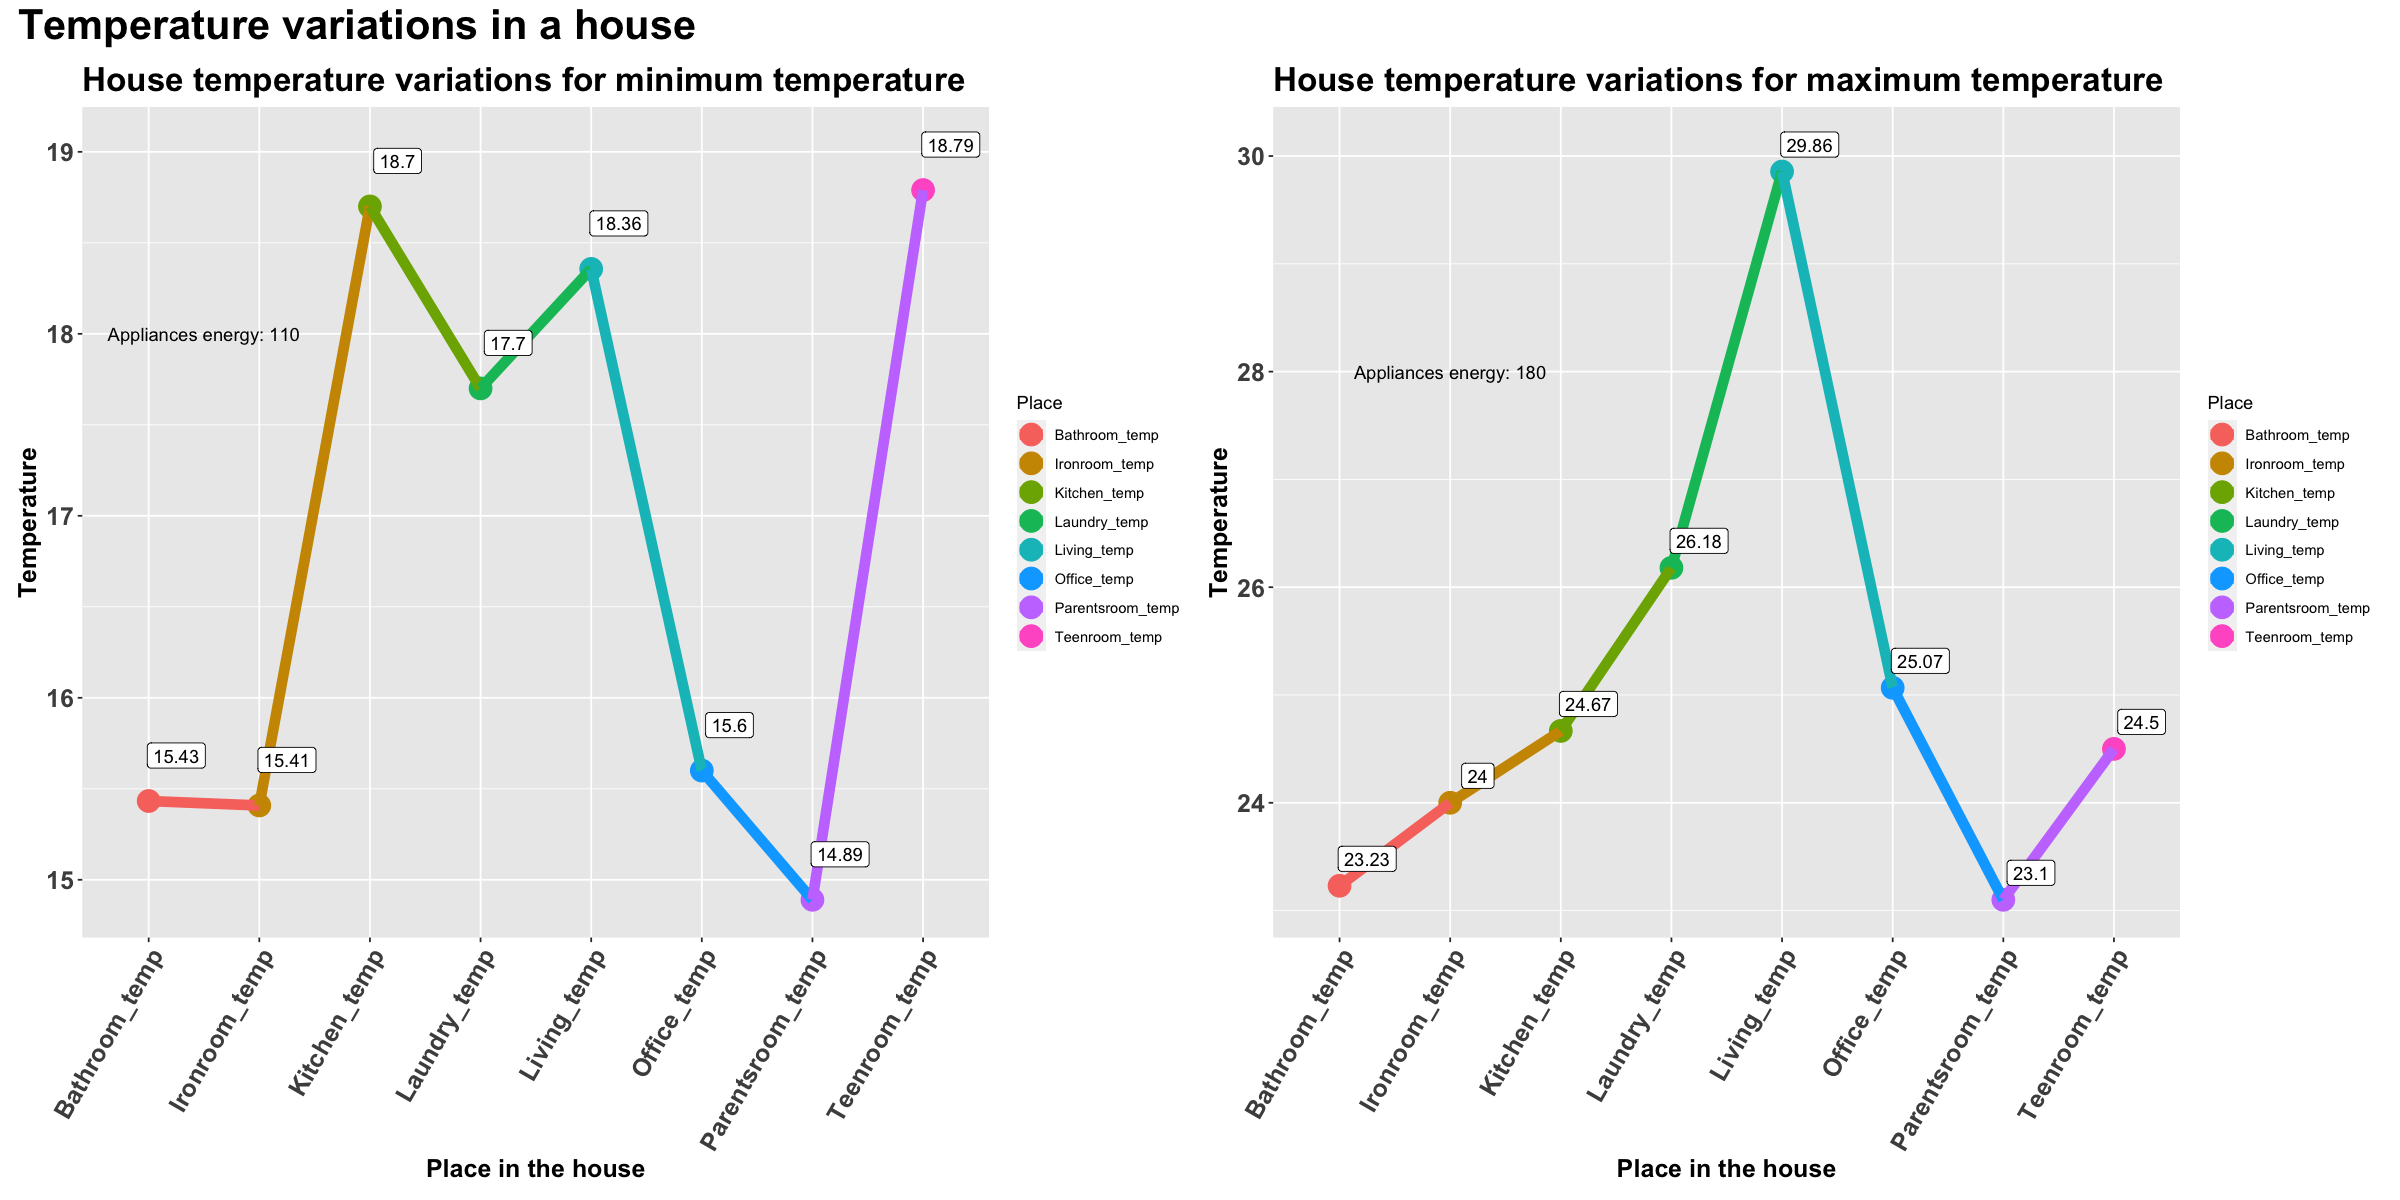

In [211]:
options(repr.plot.width=20, repr.plot.height=10)

(a+b)+plot_annotation(
  title = 'Temperature variations in a house',theme = theme(plot.title = element_text(size = 25,face="bold"))) 

Conclusion:
* We can conclude from the above that, for a minimum temperature of 14.89 is found in the Parents room when the appliances energy consumption is 110 Wh.
* A maximum temperature of 29 degree is found in the living room and the appliances energy consumption is 180.Hence, the temperature of the house has increased as the energy consumption has increased.

In [169]:
d1<-appdata
d1$weeks <- cut(appdata[,"Date"], breaks="week")

In [170]:
liv<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Living_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Living room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [171]:
bat<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Bathroom_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date()  + geom_line() +
labs(title="Bothroom temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [172]:
iron<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Ironroom_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Ironing room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [173]:
kit<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Kitchen_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Kitchen temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [174]:
lau<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Laundry_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Laundry room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [175]:
off<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Office_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Office room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [176]:
par<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Parentsroom_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Parents room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [177]:
tee<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Teenroom_temp)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Teenager room temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

In [178]:
tout<-d1 %>% group_by(weeks) %>% summarise(agg=mean(Temp_out)) %>%
ggplot(aes(as.Date(weeks), agg)) + geom_point() + scale_x_date() + geom_line() +
labs(title="Outside temperature variations",
        x ="Month", y = "Mean of temperature")+
    theme(plot.title = element_text(size = 20, face = "bold"),
         axis.title = element_text(size=15),
         axis.text= element_text(size=15))

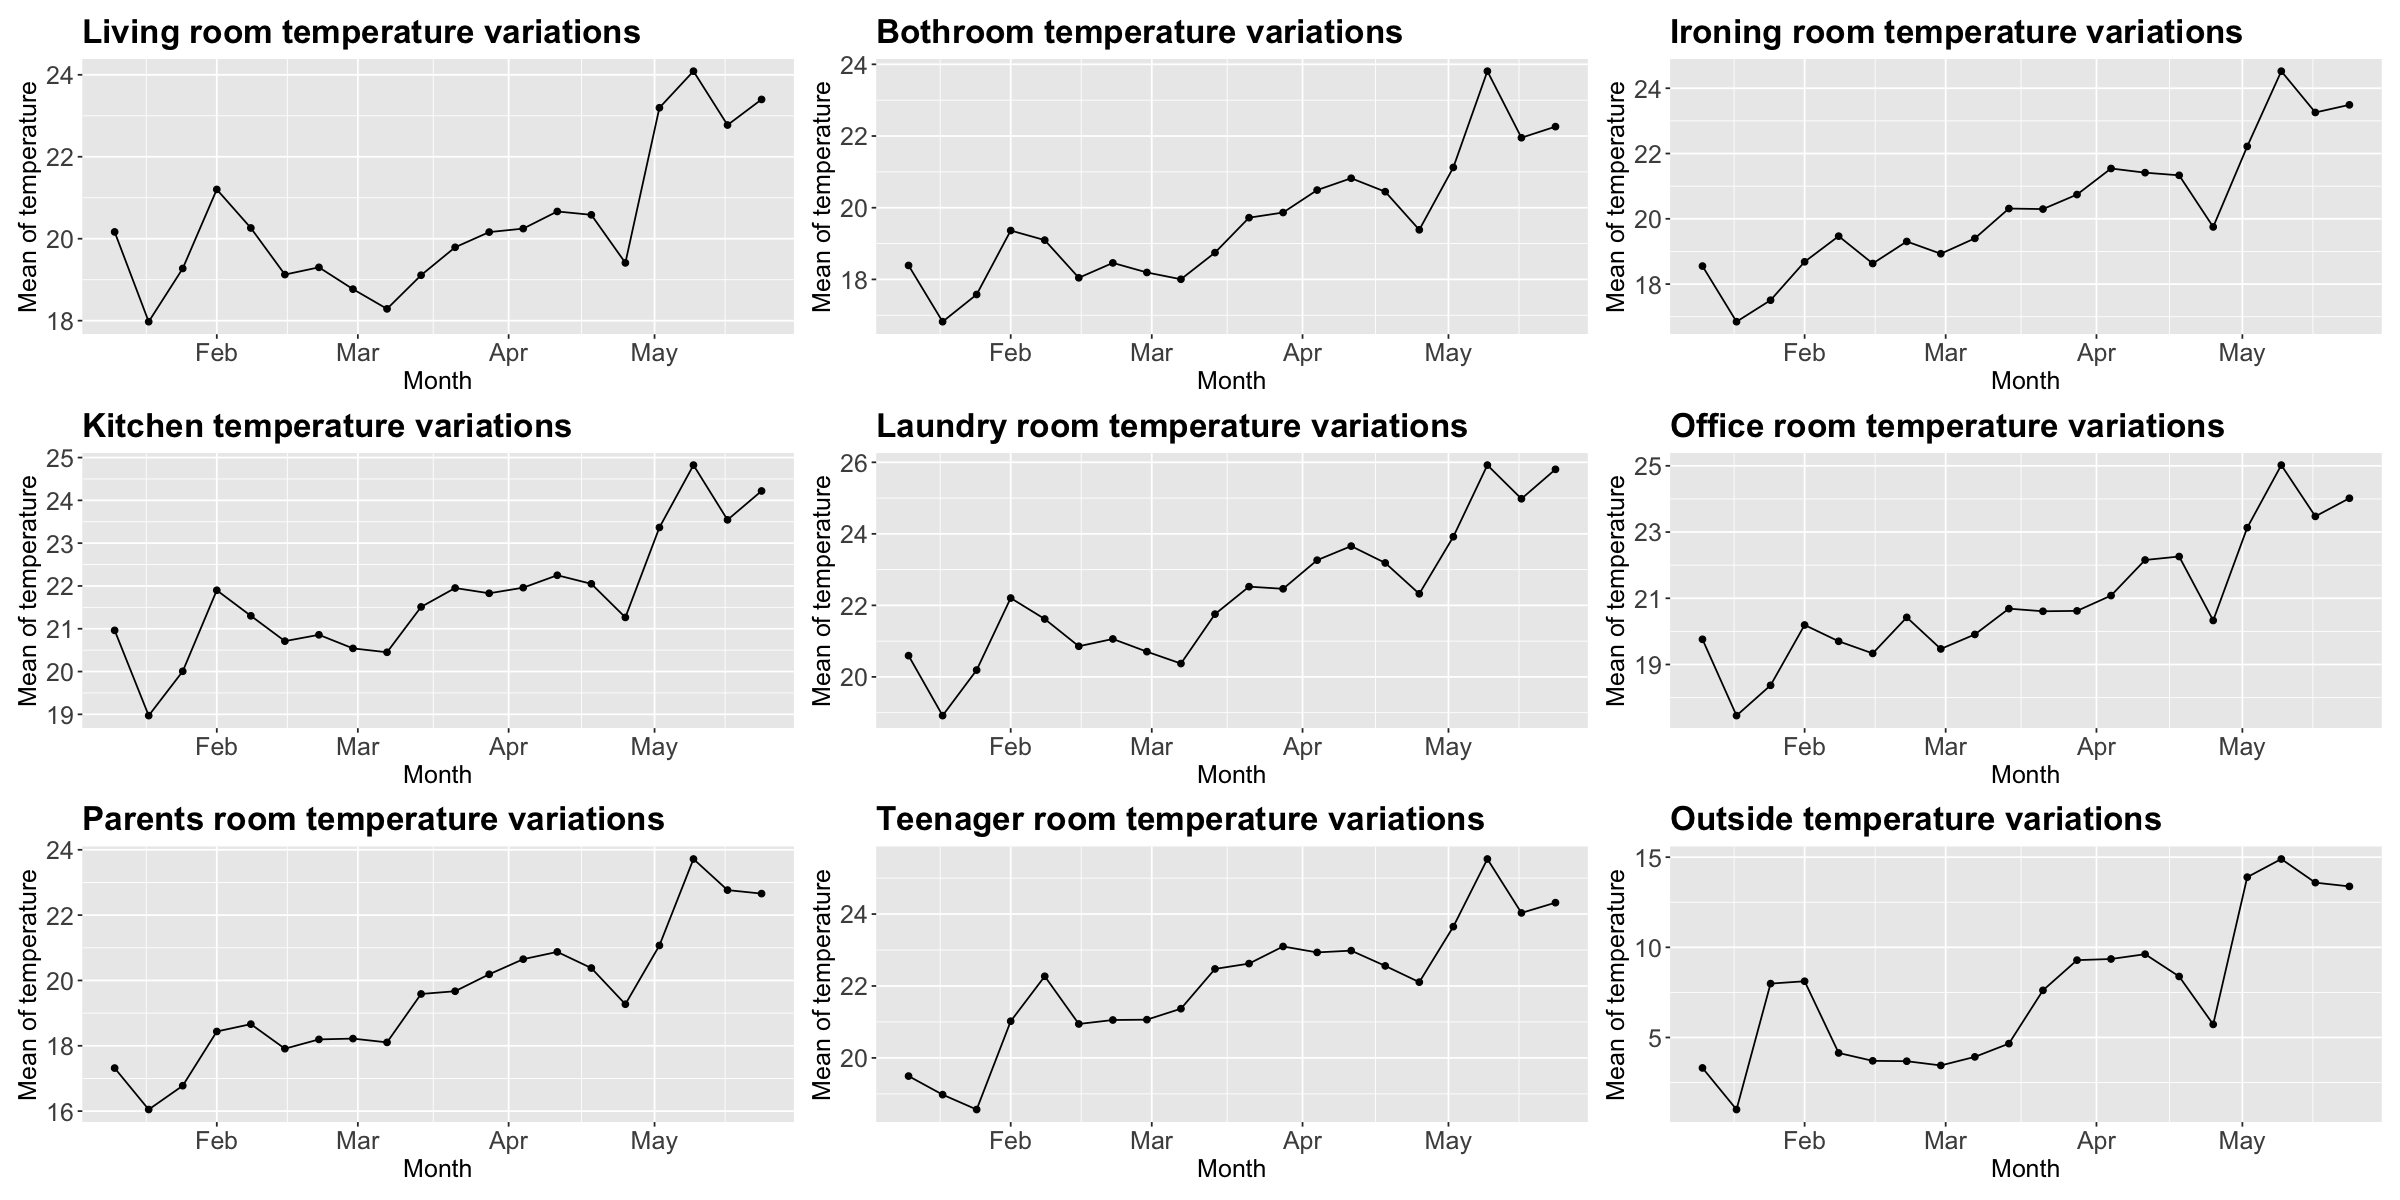

In [179]:
liv+bat+iron+kit+lau+off+par+tee+tout

From the above graph, we can conclude the below:
* The maximum temperature outside is 15 degrees and the maximum temperature inside is 25 degrees
* In all the rooms, the temperature has gradually increased and is at peak in the month of May and is at the lowest in the month of February. The same temperature fluctuations can be seen with outside temperature but the difference in inside and outside temperature is visible.
* When we take the actual temperature variations, we see that the living room had recorded the highest temperature. But once we take the mean of all the temperatures, we see that the Laundry room has the highest recorded temperature of 26 degrees.
* The bathroom and the ironing room seem to have similar temperature conditions.
* The lowest mean temperature is recorded in the Parent's room.